The weight vector for polynominal regression of degree 1 is :
[[4.02045272e+03]
 [4.40484657e-01]]
The weight vector for polynominal regression of degree 2 is :
[[ 2.10962992e+03]
 [ 1.14454734e+00]
 [-9.01712725e-06]]
The weight vector for polynominal regression of degree 3 is :
[[ 1.87440544e+03]
 [ 1.26401214e+00]
 [-1.30913278e-05]
 [ 2.91475051e-11]]
The weight vector for polynominal regression of degree 4 is :
[[ 2.99688777e+03]
 [ 4.73903189e-01]
 [ 4.49400319e-05]
 [-1.04156938e-09]
 [ 5.55076125e-15]]
The weight vector for polynominal regression of degree 5 is :
[[ 3.87966095e+03]
 [-3.91055237e-01]
 [ 1.52135350e-04]
 [-4.60668166e-09]
 [ 4.91593076e-14]
 [-1.76247667e-19]]
The weight vector for polynominal regression of degree 6 is :
[[ 3.75341137e+03]
 [-2.37541153e-01]
 [ 1.26076917e-04]
 [-3.27925290e-09]
 [ 2.10877180e-14]
 [ 8.43419662e-20]
 [-8.76985978e-25]]
The weight vector for polynominal regression of degree 7 is :
[[ 3.15117762e+03]
 [ 6.16969788e-01]
 [-5.654949

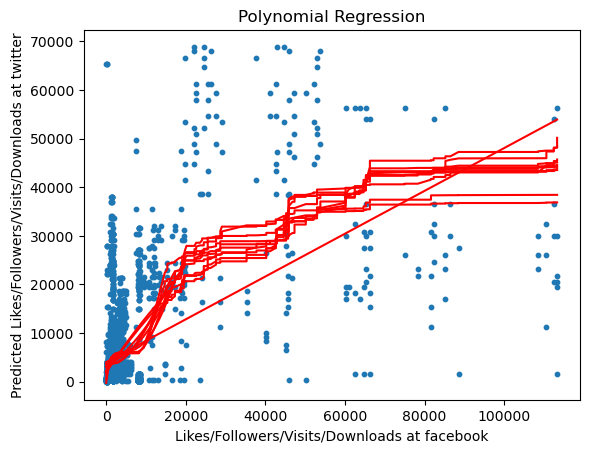

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define degree of polynomial
degree = 11

# Create polynomial features matrix
def create_polynomial_matrix(X, degree):
    X_poly_mat = []

    for i in range(1, degree + 1):
        X_poly = np.ones((len(X), 1))
        for d in range(1, i + 1):
            X_poly = np.concatenate((X_poly, X**d), axis=1)
        X_poly_mat.append(X_poly)
    return X_poly_mat

X_train_poly_mat = create_polynomial_matrix(X_train1, degree)

theta_mat = []
for ele in X_train_poly_mat:
    theta = np.linalg.inv(ele.T.dot(ele)).dot(ele.T).dot(y_train1)# Solve for coefficients using normal equation (closed-form)
    theta_mat.append(theta)

k = 1
for ele in theta_mat:
    print(f'The weight vector for polynominal regression of degree {k} is :')
    print(ele)
    k += 1

# Make predictions

X_test_poly_mat = create_polynomial_matrix(X_test1, degree)

def predict(X_poly_mat, theta_mat):
    y_pred_mat = []
    for ele1 , ele2 in zip(X_poly_mat, theta_mat):
        y_pred = ele1.dot(ele2)
        y_pred_mat.append(y_pred)
    return y_pred_mat

y_pred_mat = predict(X_test_poly_mat, theta_mat)

# Evaluate the model
def mean_squared_error(y_true, y_pred_mat):
    mean_list = []
    for ele in y_pred_mat:
        value = np.mean((y_true - ele)**2)
        mean_list.append(value)
    return mean_list

def r2_score(y_true, y_pred_mat):
    r2_list = []
    denominator = np.sum((y_true - np.mean(y_true))**2)
    for ele in y_pred_mat:
        numerator = np.sum((y_true - ele)**2)
        val = 1 - (numerator / denominator)
        r2_list.append(val)
    return r2_list

mse_list = mean_squared_error(y_test1, y_pred_mat)
r2_list = r2_score(y_test1, y_pred_mat)

index = 1
for ele1, ele2 in zip(mse_list, r2_list):
    print(f"Mean Squared Error for {index} degree polynominal model : {pow(ele1, 0.5)}")
    print(f"R-squared for {index} degree polynominal model : {ele2}")
    index += 1


# Plot data and polynomial regression curve
plt.scatter(X_test1, y_test1, s=10)

for ele in y_pred_mat:
    plt.plot(sorted(X_test1), sorted(ele), color='r')
plt.xlabel('Likes/Followers/Visits/Downloads at facebook')
plt.ylabel('Predicted Likes/Followers/Visits/Downloads at twitter')
plt.title('Polynomial Regression')
plt.show()

